In [2]:
import pandas as pd
import re

In [3]:
training = pd.read_csv('/Users/Afnan/Desktop/FinalData/FinalTraining.csv', encoding='utf-8')

In [4]:
validation= pd.read_csv('/Users/Afnan/Desktop/FinalData/FinalValidation.csv', encoding='utf-8')

In [5]:
import csv
import json

def csv_to_jsonl(csv_file_path, jsonl_file_path):
    with open(csv_file_path, 'r') as csv_file, open(jsonl_file_path, 'w') as jsonl_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            json.dump(row, jsonl_file)
            jsonl_file.write('\n')


In [6]:
csv_to_jsonl('/Users/Afnan/Desktop/FinalData/FinalTraining.csv','train_split.jsonl')

In [7]:
csv_to_jsonl('/Users/Afnan/Desktop/FinalData/FinalValidation.csv','validation_split.jsonl')

Step 1
Prepare your data

In [8]:
def transform_jsonl(input_file_path, output_file_path):
    entries = []
    with open(input_file_path, 'r') as file:
        for line in file:
            entry = json.loads(line)
            entries.append(entry)
    with open(output_file_path, 'w') as outfile:
        for entry in entries:
            messages = []
            messages.append({"role": "system", 
 "content": 
"You are an assistant to classify the Arabic posts into positive, negative or neutral towards health awareness "})
            user_message = {"role": "user", "content": entry["text"]}
            assistant_message = {"role": "assistant", "content": entry["label"]}
            messages.extend([user_message, assistant_message])
            result = {"messages": messages}
            json.dump(result, outfile, ensure_ascii=False)
            outfile.write('\n')

In [9]:
transform_jsonl("/Users/Afnan/Desktop/FinalData/train_split.jsonl", "Format_train_split.jsonl")

In [10]:
transform_jsonl("/Users/Afnan/Desktop/FinalData/validation_split.jsonl", "Format_validation_split.jsonl")

Step 2
Upload files

In [11]:

import openai

openai.api_key= "   "

In [12]:
import pip
print(pip.__file__)


c:\Users\Afnan\anaconda3\Lib\site-packages\pip\__init__.py


In [13]:

client = openai.OpenAI(api_key="")
training_response = client.files.create(
    file=open("/Users/Afnan/Desktop/FinalData/Format_train_split.jsonl", "rb"), purpose="fine-tune"
)
training_file_id = training_response.id

validation_response = client.files.create(
    file=open("/Users/Afnan/Desktop/FinalData/Format_validation_split.jsonl", "rb"), purpose="fine-tune"
)
validation_file_id = validation_response.id

print("Training file id:", training_file_id)
print("Validation file id:", validation_file_id)

Training file id: file-a70lxStY2oLEIcM9NMlb8waJ
Validation file id: file-V9YaNva6chzwov9jDnLg9nTV


In [14]:
import pip
print(pip.__file__)


c:\Users\Afnan\anaconda3\Lib\site-packages\pip\__init__.py


Step 3
Create a fine-tuning job

In [15]:
suffix_name = "samantha-test"


response = client.fine_tuning.jobs.create(
    training_file=training_file_id,
    validation_file=validation_file_id,
    model="gpt-3.5-turbo",
    suffix=suffix_name,
)

job_id = response.id

print(response)

FineTuningJob(id='ftjob-Pyweyzaw7VycvlRk7qj5EjMW', created_at=1715703197, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs='auto', batch_size='auto', learning_rate_multiplier='auto'), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-Fi9mlsoWL88JdIl2wSCu95we', result_files=[], seed=1116149602, status='validating_files', trained_tokens=None, training_file='file-a70lxStY2oLEIcM9NMlb8waJ', validation_file='file-V9YaNva6chzwov9jDnLg9nTV', estimated_finish=None, integrations=[], user_provided_suffix='samantha-test')


In [16]:
response = client.fine_tuning.jobs.retrieve(job_id)
print(response)

FineTuningJob(id='ftjob-Pyweyzaw7VycvlRk7qj5EjMW', created_at=1715703197, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs='auto', batch_size='auto', learning_rate_multiplier='auto'), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-Fi9mlsoWL88JdIl2wSCu95we', result_files=[], seed=1116149602, status='validating_files', trained_tokens=None, training_file='file-a70lxStY2oLEIcM9NMlb8waJ', validation_file='file-V9YaNva6chzwov9jDnLg9nTV', estimated_finish=None, integrations=[], user_provided_suffix='samantha-test')


In [29]:
response = client.fine_tuning.jobs.list_events(fine_tuning_job_id=job_id, limit=50)

    
events = [event for event in response]
events.reverse()  

for event in events:
        
    if hasattr(event, 'message'):
        print(event.message)
    else:
        print("Event does not have a 'message' attribute.")

Created fine-tuning job: ftjob-Pyweyzaw7VycvlRk7qj5EjMW
Validating training file: file-a70lxStY2oLEIcM9NMlb8waJ and validation file: file-V9YaNva6chzwov9jDnLg9nTV
Files validated, moving job to queued state
Fine-tuning job started
Step 1/1767: training loss=1.19
Step 2/1767: training loss=0.87
Step 3/1767: training loss=1.09
Step 4/1767: training loss=1.32
Step 5/1767: training loss=0.55
Step 6/1767: training loss=0.60
Step 7/1767: training loss=0.51
Step 8/1767: training loss=1.47
Step 9/1767: training loss=1.37
Step 10/1767: training loss=0.80
Step 11/1767: training loss=0.70
Step 12/1767: training loss=1.30
Step 13/1767: training loss=0.36
Step 14/1767: training loss=0.73
Step 15/1767: training loss=0.07
Step 16/1767: training loss=0.15
Step 17/1767: training loss=0.11
Step 18/1767: training loss=1.27
Step 19/1767: training loss=0.46
Step 20/1767: training loss=0.42
Step 21/1767: training loss=1.01
Step 22/1767: training loss=0.07
Step 23/1767: training loss=0.34
Step 24/1767: train

In [30]:
response = client.fine_tuning.jobs.retrieve(job_id)
if hasattr(response, 'fine_tuned_model'):  
        fine_tuned_model_id = response.fine_tuned_model
        print("Fine-tuned model id:", fine_tuned_model_id)
        response = client.fine_tuning.jobs.retrieve(job_id)
        print(response)
        
else:
        print("The response does not contain a 'fine_tuned_model' attribute.")

Fine-tuned model id: ft:gpt-3.5-turbo-0125:personal:samantha-test:9OpvDoJW
FineTuningJob(id='ftjob-Pyweyzaw7VycvlRk7qj5EjMW', created_at=1715703197, error=Error(code=None, message=None, param=None), fine_tuned_model='ft:gpt-3.5-turbo-0125:personal:samantha-test:9OpvDoJW', finished_at=1715706486, hyperparameters=Hyperparameters(n_epochs=3, batch_size=4, learning_rate_multiplier=2), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-Fi9mlsoWL88JdIl2wSCu95we', result_files=['file-dFIFbkZL9YsnDYRcl6eqJCue'], seed=1116149602, status='succeeded', trained_tokens=721605, training_file='file-a70lxStY2oLEIcM9NMlb8waJ', validation_file='file-V9YaNva6chzwov9jDnLg9nTV', estimated_finish=None, integrations=[], user_provided_suffix='samantha-test')


In [31]:
file_path = "Fine-tuned-gpt3.5(training-validation).json"

with open(file_path, "w") as json_file:
    json.dump(fine_tuned_model_id, json_file)

test

In [32]:
testing = pd.read_csv('/Users/Afnan/Desktop/FinalData/FinalTest.csv', encoding='utf-8')

In [33]:
print(testing['text'])

0      افضل الرياضة صحيا وفيه اجر هي رياضة المشي الى ...
1      • زحمة ال Gym يوم السبت زي زحم ة الطريق يوم ال...
2      الحمدلله اليوم جددت اشتراك سنة مع فتنس تايم مس...
3      MENTION انا احب العبها ككارديو لو صامل الوعد ف...
4                فطوري بعدين اقول ليه فيني سوء تغذية URL
                             ...                        
714    MENTION صادق انا اتمرن وبديت تضخيم من اول الشت...
715    لازم الحق ابدا نظام غذائي الوضع قاعد يتفاقم يا...
716    اختبار تحمل ركض روحه جيه ٤٨ مرة✅✅ بعتبره اقوى ...
717    اوكي خلاص سويت ميزانية للراتب وطلع مافي فلوس ا...
718    اخووك يمثلني اتذكر انا وصديقتي اول يوم دايت و ...
Name: text, Length: 719, dtype: object


In [34]:
tweet_data = testing['text']

print(tweet_data)

0      افضل الرياضة صحيا وفيه اجر هي رياضة المشي الى ...
1      • زحمة ال Gym يوم السبت زي زحم ة الطريق يوم ال...
2      الحمدلله اليوم جددت اشتراك سنة مع فتنس تايم مس...
3      MENTION انا احب العبها ككارديو لو صامل الوعد ف...
4                فطوري بعدين اقول ليه فيني سوء تغذية URL
                             ...                        
714    MENTION صادق انا اتمرن وبديت تضخيم من اول الشت...
715    لازم الحق ابدا نظام غذائي الوضع قاعد يتفاقم يا...
716    اختبار تحمل ركض روحه جيه ٤٨ مرة✅✅ بعتبره اقوى ...
717    اوكي خلاص سويت ميزانية للراتب وطلع مافي فلوس ا...
718    اخووك يمثلني اتذكر انا وصديقتي اول يوم دايت و ...
Name: text, Length: 719, dtype: object


In [35]:
tweet_data[0]

'افضل الرياضة صحيا وفيه اجر هي رياضة المشي الى المسجد'

In [36]:
test_messages = []
test_messages.append({"role": "system", 
"content": 
"You are an assistant to classify the Arabic posts into positive, negative or neutral towards health awareness"})
user_message = "حتى لو مافيك تعمل تمارين امشي بس"
test_messages.append({"role": "user", "content": user_message})

print(test_messages)

[{'role': 'system', 'content': 'You are an assistant to classify the Arabic posts into positive, negative or neutral towards health awareness'}, {'role': 'user', 'content': 'حتى لو مافيك تعمل تمارين امشي بس'}]


In [37]:

print("Using model ID:", fine_tuned_model_id)
if not fine_tuned_model_id:
    print("Model ID is not set. Please check the model ID.")

Using model ID: ft:gpt-3.5-turbo-0125:personal:samantha-test:9OpvDoJW


In [38]:
response = client.chat.completions.create(
    model=fine_tuned_model_id, messages=test_messages, temperature=0, max_tokens=500
)
message_content = response.choices[0].message.content
print(message_content)

Positive


In [39]:
label_pred = []

for i in range(len(tweet_data)):

    test_messages = []
    test_messages.append({"role": "system", "content": "You are an assistant to classify the Arabic posts into positive, negative or neutral towards health awareness"})
    user_message = tweet_data[i]
    test_messages.append({"role": "user", "content": user_message})


    response = client.chat.completions.create(
        model=fine_tuned_model_id, messages=test_messages, temperature=0, max_tokens=500
    )
    message_content = response.choices[0].message.content
    label_pred.append(message_content)  
    

In [40]:
print(label_pred)

['Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Neutral', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Posit

In [41]:
label_true = testing['label']
label_true = label_true.tolist()
print(label_true)

['Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Posi

In [42]:
label_pred_labelled = []

label_labels = {
    "Positive": ["0"],
    "Negative": ["2"],
    "Neutral": ["1"],
}

for predicted_label in label_pred:
    labelled_label = None  
    for label, country_label in label_labels.items():
        if predicted_label in country_label:
            labelled_label = label
            break  

    if labelled_label is not None:
        label_pred_labelled.append(labelled_label)
    else:
        label_pred_labelled.append(predicted_label)


In [43]:
print(label_pred_labelled)

['Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Neutral', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Posit

In [44]:
label_data = {'Predicted label': label_pred_labelled, 'Actual label': label_true}

df=pd.DataFrame(label_data)

df.to_csv('label_predictions.csv', index=False)

In [45]:
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix

import matplotlib.pyplot as plt

import seaborn as sns

Accuracy: 0.885952712100139


F1-Score - macro: 0.5538385100428895


F1-Score - weighted: 0.8784302814941476


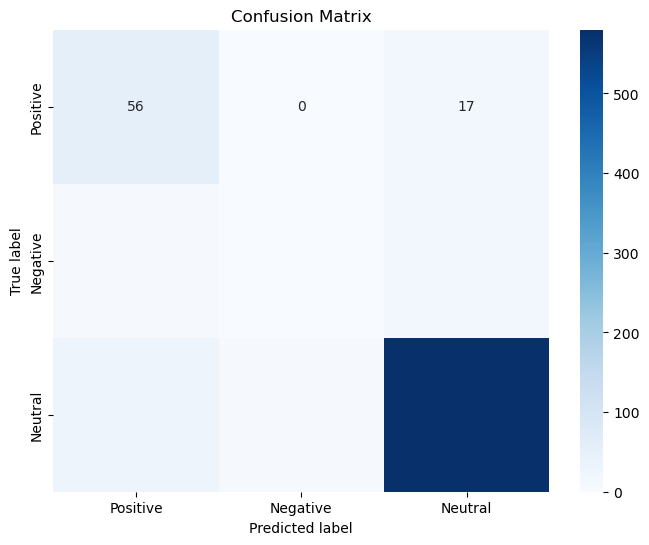

In [46]:
accuracy = accuracy_score(label_true, label_pred_labelled)
print("Accuracy:" , accuracy)
f1score_macro = f1_score(label_true, label_pred_labelled, average='macro')
print("\n")
print("F1-Score - macro:", f1score_macro)
f1score_weighted = f1_score(label_true, label_pred_labelled, average='weighted')
print("\n")
print("F1-Score - weighted:", f1score_weighted)




cm = confusion_matrix(label_true, label_pred_labelled)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Positive", "Negative", "Neutral"],
            yticklabels=["Positive", "Negative", "Neutral"])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [47]:
from sklearn.metrics import classification_report

# Determine unique classes in true labels
unique_classes = sorted(set(label_true))

# For testing dataset
testing_report = classification_report(label_true, label_pred_labelled, labels=unique_classes, target_names=["Positive", "Negative", "Neutral"])
print("Testing Classification Report:")
print(testing_report)



Testing Classification Report:
              precision    recall  f1-score   support

    Positive       0.59      0.77      0.67        73
    Negative       0.11      0.04      0.05        28
     Neutral       0.94      0.94      0.94       618

    accuracy                           0.89       719
   macro avg       0.55      0.58      0.55       719
weighted avg       0.87      0.89      0.88       719

